In [1]:
using CairoMakie, LinearAlgebra, NAJ, FileIO
using LoopVectorization

In [5]:
E(r, z) = z/((r^2+z^2)^1.5) + (1-z)/((r^2+(1-z)^2)^1.5) 

rr = 0.01:0.01:1
zz = -1:0.02:2

img = [E(r, z) for r in rr, z in zz]





100×151 Matrix{Float64}:
 -0.749859  -0.786004  -0.824595  …  -0.824595  -0.786004  -0.749859
 -0.749438  -0.785546  -0.824096     -0.824096  -0.785546  -0.749438
 -0.748736  -0.784783  -0.823265     -0.823265  -0.784783  -0.748736
 -0.747755  -0.783716  -0.822104     -0.822104  -0.783716  -0.747755
 -0.746496  -0.782348  -0.820615     -0.820615  -0.782348  -0.746496
 -0.744961  -0.780681  -0.8188    …  -0.8188    -0.780681  -0.744961
 -0.743153  -0.778716  -0.816662     -0.816662  -0.778716  -0.743153
 -0.741075  -0.776458  -0.814205     -0.814205  -0.776458  -0.741075
 -0.738729  -0.77391   -0.811433     -0.811433  -0.77391   -0.738729
 -0.73612   -0.771076  -0.80835      -0.80835   -0.771076  -0.73612
  ⋮                               ⋱                         ⋮
 -0.211119  -0.213266  -0.215268     -0.215268  -0.213266  -0.211119
 -0.206272  -0.208249  -0.210078     -0.210078  -0.208249  -0.206272
 -0.201508  -0.203323  -0.204986     -0.204986  -0.203323  -0.201508
 -0.196829  -0.19

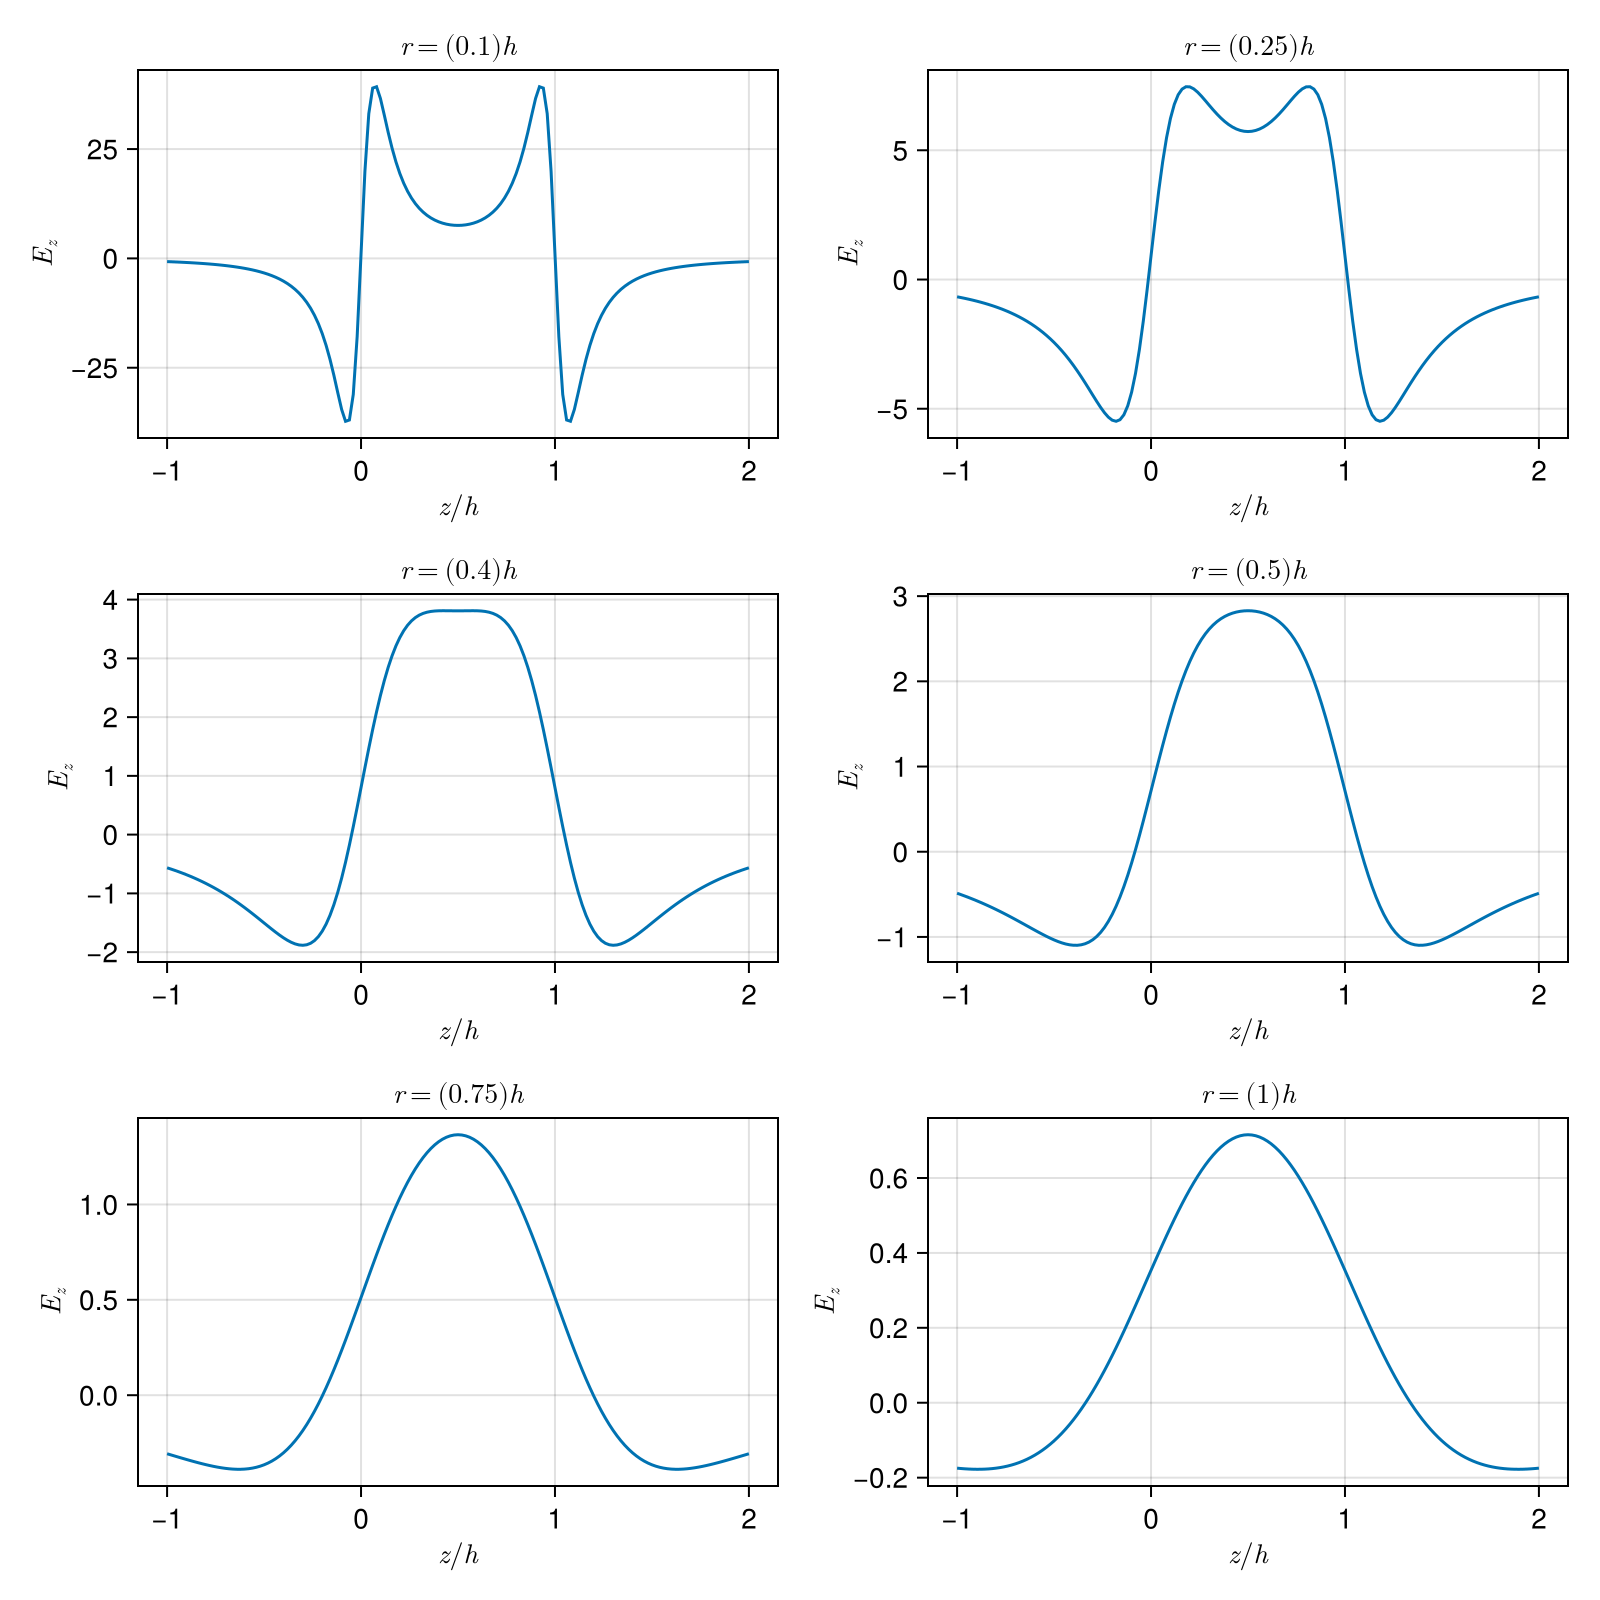

In [37]:
fig=Figure(size=(800, 800))
ax1 =Axis(fig[1,1], title = L"r=(0.1)h", xlabel=L"z/h", ylabel=L"E_z")
lines!(ax1, zz, img[10,:])
ax2 = Axis(fig[1, 2], title = L"r=(0.25)h", xlabel = L"z/h", ylabel=L"E_z")
lines!(ax2, zz, img[25,:])
ax3 = Axis(fig[2, 1], title = L"r=(0.4)h", xlabel = L"z/h", ylabel=L"E_z")
lines!(ax3, zz, img[40,:])
ax4 = Axis(fig[2, 2], title = L"r=(0.5)h", xlabel = L"z/h", ylabel=L"E_z")
lines!(ax4, zz, img[50,:])
ax5 = Axis(fig[3, 1], title = L"r=(0.75)h", xlabel = L"z/h", ylabel=L"E_z")
lines!(ax5, zz, img[75,:])
ax6 = Axis(fig[3, 2], title = L"r=(1)h", xlabel = L"z/h", ylabel=L"E_z")
lines!(ax6, zz, img[100,:])

#
# save("../images/Electromagnetism/electrostatics/exr_purcell_chap01/exr_purcell_1_13_1.png", fig)
fig

In [38]:
sqrt(1.0e-8 * 1.0e-6 /(2 * 8.854e-12*1.0e-3 * 0.1))

2.376376469145451

In [5]:
function f(y)
    P1 = [0, 1]
    P2 = [-√3/2, -1/2]
    P3 = [√3/2, -1/2] 
    P = [0, y]
    return 1/(norm(P .- P1))^2 - ((P.-P2)[2])/(norm(P .- P2)^3) -  ((P.-P3)[2])/(norm(P .- P3)^3)
end
g(y) = -(y-1)/(abs(y-1)^3) + 2*(y+0.5)/((3/4 + (y+0.5)^2)^1.5)

g (generic function with 1 method)

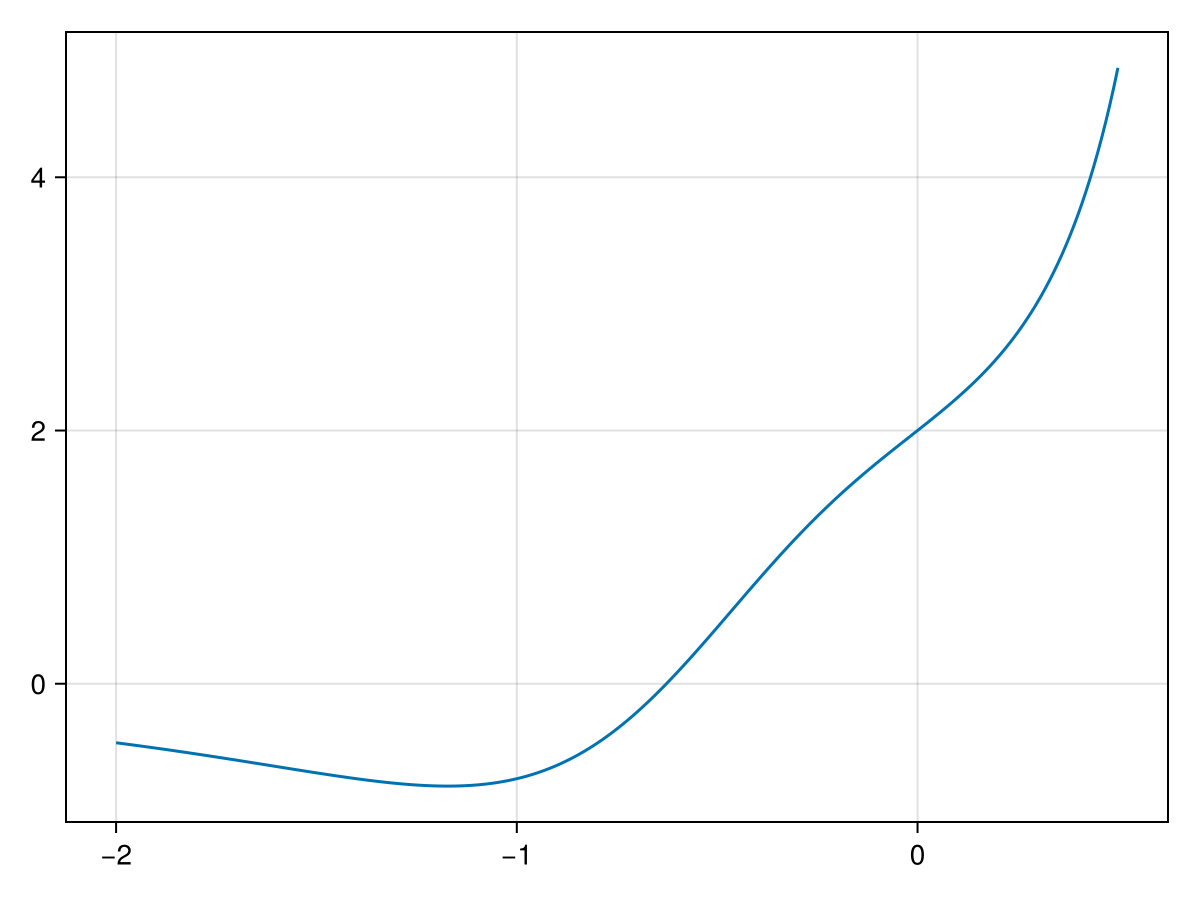

In [6]:
y =  -2:0.01:0.5
fig= Figure()
ax = Axis(fig[1, 1])
# lines!(ax, y, f.(y))
lines!(ax, y, g.(y))
fig

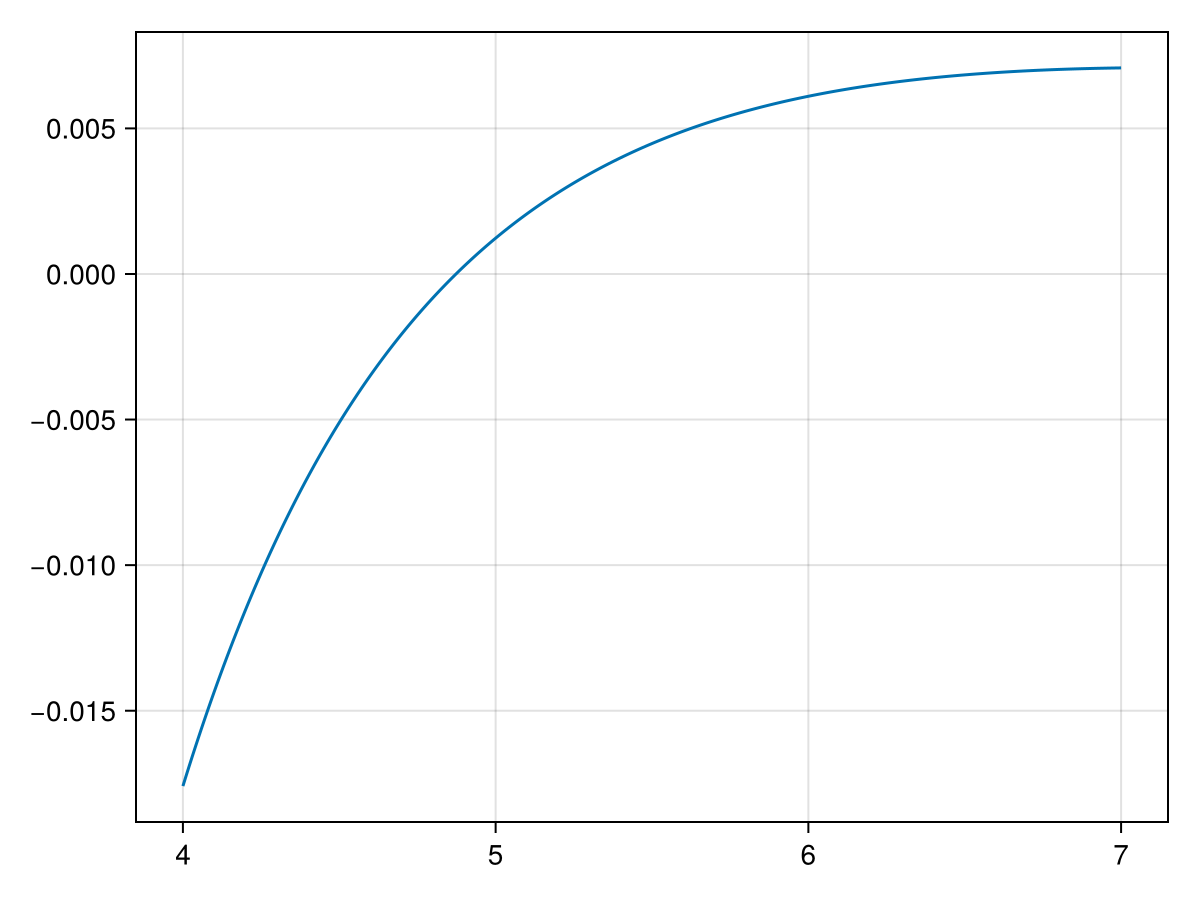

In [7]:
y =  4:0.01:7
fig= Figure()
ax = Axis(fig[1, 1])
# lines!(ax, y, f.(y))
lines!(ax, y, g.(y))
fig

In [8]:
rootfinding_bisection(g, 4, 6)

(4.873241390322832, 47)

In [9]:
4.4724*2/sqrt(3)

5.164282687847365

In [23]:
function calc_potential_per_ion(M::Integer)
    U = 0.0
    for i in -M:1:M, j ∈ -M:1:M
        if (i, j) == (0, 0)
            U += 0
        elseif iseven(i+j)
            U += 1/sqrt(i^2+j^2)/2
        else 
            U -=1/sqrt(i^2+j^2)/2
        end
    end
    return U
end

M = [1, 3, 5, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 50000]
P = calc_potential_per_ion.(M)


13-element Vector{Float64}:
 -0.5857864376269051
 -0.7072855126989305
 -0.7436222379163143
 -0.7741186716480258
 -0.8007704277030607
 -0.8042533909405954
 -0.8060079575413927
 -0.8070649131519267
 -0.8074179366762397
 -0.8075945808467639
 -0.807700609747406
 -0.80773595978062
 -0.8077642423620823

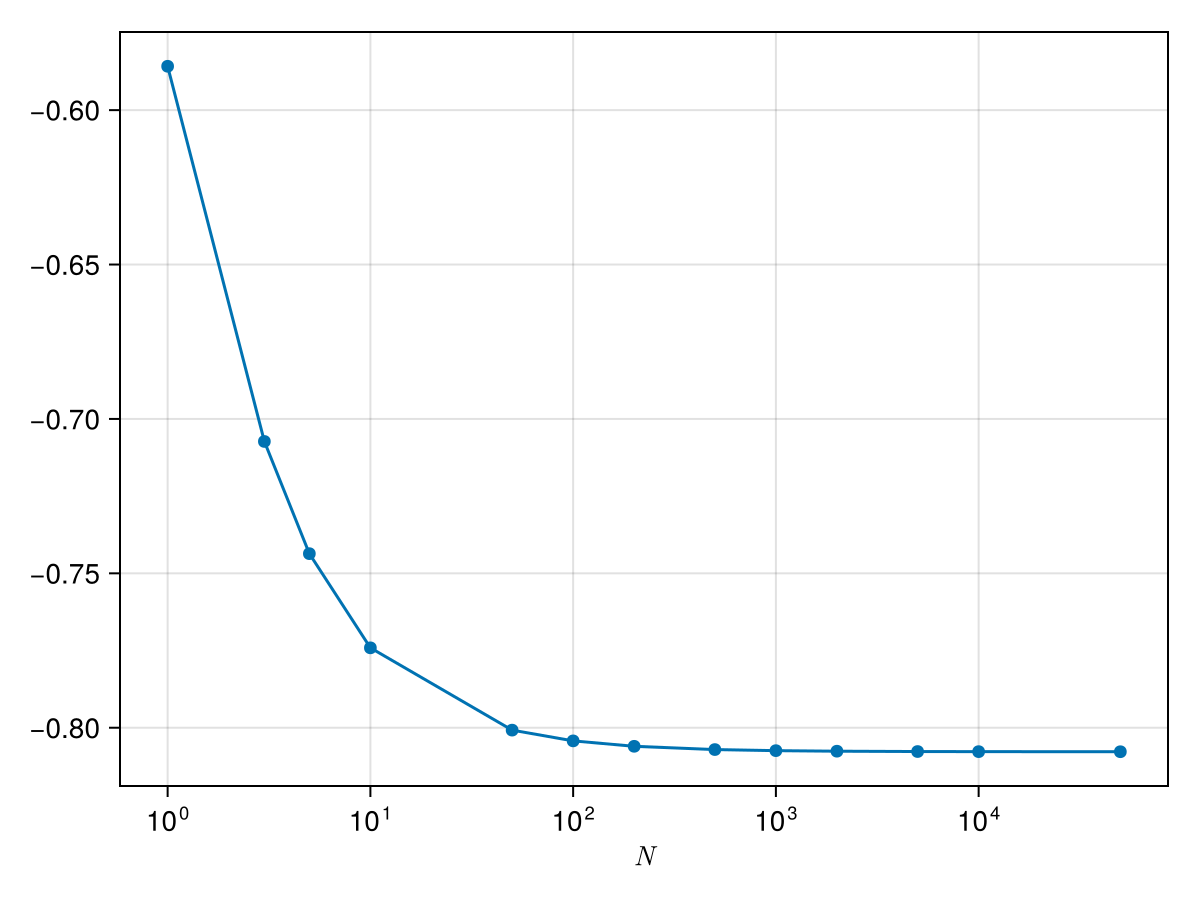

In [29]:

fig= Figure()
ax = Axis(fig[1, 1], xscale = log10, xlabel = L"N")
# lines!(ax, y, f.(y))
scatterlines!(ax, M, P )
fig


In [34]:
save("../images/Electromagnetism/electrostatics/exr_purcell_1_7/result.png", fig)

CairoMakie.Screen{IMAGE}


In [17]:
sum([((-1)^m)/m for m in 1:1000])  + sum([((-1)^(m+n))/sqrt(m^2+n^2) for n in -1000:1:1000 for m in 1:1000])

-0.8074179366762374

In [32]:
pwd()

"/Users/jiyongso/Documents/Projects/ClassicalMechanics/src/Electromagnetism"